In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [8]:
df = pd.read_csv('../Datasets/Titanic.csv')

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [4]:
from statsmodels.graphics.mosaicplot import mosaic

In [5]:
def colors(row):
    #print(row)
    survived, pclass, sex = row
    if(survived=='1'):
        if(pclass=='1'):
            if(sex=='male'):
                return {'color':'#e1f5fe'}
            if(sex=='female'):
                return {'color':'#b3e5fc'}
        elif(pclass=='2'):
            if(sex=='male'):
                return {'color':'#81d4fa'}
            if(sex=='female'):
                return {'color':'#4fc3f7'}
        else:
            if(sex=='male'):
                return {'color':'#29b6f6'}
            if(sex=='female'):
                return {'color':'#03a9f4'}
            
    else:
        if(pclass=='1'):
            if(sex=='male'):
                return {'color':'#ffe5e5'}
            if(sex=='female'):
                return {'color':'#ffcccc'}
        elif(pclass=='2'):
            if(sex=='male'):
                return {'color':'#ffb2b2'}
            if(sex=='female'):
                return {'color':'#ff9999'}
        else:
            if(sex=='male'):
                return {'color':'#ff7f7f'}
            if(sex=='female'):
                return {'color':'#ff6666'}
        

In [35]:
#df = pd.DataFrame({'size' : ['small', 'large', 'large', 'small', 'large', 'small', 'large', 'large'], 'length' : ['long', 'short', 'medium', 'medium', 'medium', 'short', 'long', 'medium'], 'temp' : ['cold', 'hot', 'cold', 'warm', 'warm', 'cold', 'hot', 'warm']})

props = {}
single_low = 28
max_start = 255
max_start_oth = 229
diff = 25
r,g,b=max_start,max_start_oth,max_start_oth
for x in df['sex'].unique(): #unique colums in each
    for y in df['pclass'].unique():
        col = '#{}{}{}'.format(format(int(r),'02x'),format(int(g),'02x'),format(int(b),'02x'))
        for z in df['survived'].unique():
            props[(str(z), str(y), str(x))] ={'color': col}
            if r==max_start:
                g-=diff
                b-=diff
            elif b==max_start:
                r-=diff
                g-=diff
            elif g==max_start:
                r-=diff
                b-=diff
            if (g<single_low and b<single_low):
                b,r,g=max_start,max_start_oth,max_start_oth
            elif (r<single_low and g<single_low):
                g,b,r = max_start,max_start_oth,max_start_oth
            elif (r<single_low and b<single_low):
                print("no more colors")

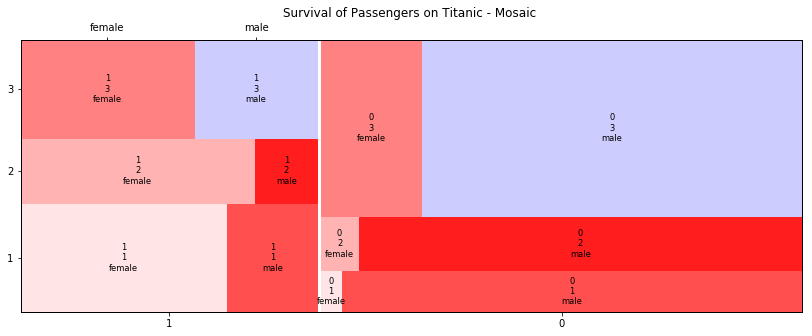

In [38]:
import matplotlib as mpl
from statsmodels.graphics.mosaicplot import mosaic
mpl.rc("figure", figsize=(14,5))
mosaic(df, ['survived', 'pclass', 'sex'], properties=props, title='Survival of Passengers on Titanic - Mosaic ')
plt.show()